# Connor Marsh ECE1180 Project 1

## Initial Notes
All units in this notebook are SI. So meters for distance, kilograms for mass, seconds for time, etc.  
I talked to Dr. Bocan about this, but the visualizations always seemed kind of choppy, and I messed around with time step size and was never able to fix this. Dr. Bocan said it is probably just an issue with my computer monitor refresh rate or VPython or something out of my control.  
For time step size I used a value between 0.005 and 0.0005 most of the time. I messed around with it a bit but found that anything around that range gave quite accurate results!

Overall I kind of got bogged down with work this week and didn't get to do as much experimentation and play and analysis as I would've liked to in the end. But might do some more on my own after submitting!

## Ball Falling
We drop the ball from 20 meters in the air and watch it fall!

In [97]:
from vpython import *
scene = canvas()
scene.autoscale = True
ball = sphere(pos=vector(0,20,0), radius=0.3, color=color.cyan)
floor = box(pos=vector(0,0,0), size=vector(20,0.3,20), color=color.green)
ball.velocity = vector(0,0,0)
ball.acceleration = vector(0, -9.8, 0)
deltat = 0.0005
t = 0
while t < 3:
    ball.velocity = ball.velocity + ball.acceleration*deltat
    ball.pos = ball.pos + ball.velocity*deltat
    
    
    t = t + deltat
    if ball.pos.y < 0:
        break
    rate(float(1) / deltat)

<IPython.core.display.Javascript object>

### Analysis
Looks good! Can play around with initial heights and velocities but it is quite simple and this clearly shows what is going on. First I verified that this was going on in real time by printing the "t" variable at the end of the simulation, while simultaneously using a stopwatch to time the simulation from start to finish as it runs on my screen, and making sure those are the same. This is obviously a little crude method, I just used it as a sanity check to make sure I could trust what was going on  
To more thoroughly verify, I used the closed form solutions for the model equations to get exact answers for the time to fall and final velocity when falling from a specific height, and then compared those to the results when printing out the values at simulation end. These values were very close but never exactly the same (usually within 0.1% error which is pretty good).  
I messed around with the time step and using forward vs backward vs semi-implicit numerical integration techniques to see if I could improve the accuracy, but I couldn't really. I think this might be due to when the time step size gets small, rounding errors in python pile up a bit over time and you can never get super super accurate (<%0.01) error results.

## Ball Bouncing
Make sure to set the position to 0 right afterwards to align

In [8]:
scene = canvas()
scene.autoscale = False
ball = sphere(pos=vector(0,2,0), radius=0.1, color=color.cyan)
floor = box(pos=vector(0,0,0), size=vector(20,0.1,20), color=color.green)
ball.velocity = vector(0,0,0)
ball.acceleration = vector(0, -9.8, 0)
deltat = 0.005
t = 0
while t < 3:
    ball.velocity = ball.velocity + ball.acceleration*deltat
    ball.pos = ball.pos + ball.velocity*deltat
    
    
    t = t + deltat
    if ball.pos.y < 0:
        ball.pos.y = 0
        ball.velocity.y *= -1
    rate(float(1) / deltat)

<IPython.core.display.Javascript object>

### Analysis
Looks good! Used same verification techniques as in ball falling. Again this is quite simple and not much to do here

## Cannonball

In [92]:
scene = canvas()
scene.autoscale = False
scene.camera.rotate(angle=-20, axis=vector(1,0,0))
ball = sphere(pos=vector(0,0,0), radius=0.3, color=color.cyan)
floor = box(pos=vector(0,0,0), size=vector(20,0.1,20), color=color.green)
ball.velocity = vector(3,10,4)
ball.acceleration = vector(0, -9.8, 0)
deltat = 0.005
t = 0
while t < 3:
    ball.velocity = ball.velocity + ball.acceleration*deltat
    ball.pos = ball.pos + ball.velocity*deltat
    
    
    t = t + deltat
    if ball.pos.y < 0:
        break
    rate(float(1) / deltat)

# Crude method of repeating the simulation but works for now
t=0
ball.pos = vector(0, 0, 0)
ball.velocity = vector(3,10,-4)
while t < 3:
    ball.velocity = ball.velocity + ball.acceleration*deltat
    ball.pos = ball.pos + ball.velocity*deltat
    
    
    t = t + deltat
    if ball.pos.y < 0:
        break
    rate(float(1) / deltat)

t=0
ball.pos = vector(0, 0, 0)
ball.velocity = vector(-3,10,-4)
while t < 3:
    ball.velocity = ball.velocity + ball.acceleration*deltat
    ball.pos = ball.pos + ball.velocity*deltat
    
    
    t = t + deltat
    if ball.pos.y < 0:
        break
    rate(float(1) / deltat)

<IPython.core.display.Javascript object>

### Analysis
Here we run the simulation 3 times in a row with different intial velocities. We also rotate the camera at a slight angle so we can see the ball moving more in 3 dimensions!

## Ball Falling with Air Resistance
**Equation for air resistance:** $F_{air}=\frac{1}{2}\rho C_dAv^2$  
Where $F_{air}$ is the force on the object by the air  
$\rho$ is the density of the air, which for our purposes is constant, and we will assume it to be the air density at sea level which is $1.204\frac{kg}{m^3}$  
$C_d$ is the drag coefficient which depends on shape and other properties. According to wikipedia, the $C_d$ for a highly smooth sphere is around 0.1, so we will use that.  
$A$ is the cross-sectional area which for us is $2\pi r$  
**Sources:**  
[Testbook air resistance formula](https://testbook.com/physics-formulas/air-resistance-formula#:~:text=The%20air%20resistance%20formula%20can%20be%20mathematically%20stated,%3D%20Relative%20Velocity%20of%20the%20object%20with%20air)  
[Wikipedia page on drag coefficient](https://en.wikipedia.org/wiki/Drag_coefficient)  
[Wikipedia page on density of air](https://en.wikipedia.org/wiki/Density_of_air)

In [5]:
scene = canvas()
scene.autoscale = False

g_acceleration = vector(0, -9.8, 0)
airDensity = 1.204
dragCoeff = 0.1


ball = sphere(pos=vector(0,10,0), radius=0.1, color=color.cyan)
floor = box(pos=vector(0,0,0), size=vector(20,0.1,20), color=color.green)
ball.velocity = vector(0,0,0)
ball.mass = 0.1 # in kgs

deltat = 0.005
t = 0
while t < 5:
    ball.g_force = g_acceleration*ball.mass
    if mag(ball.velocity)==0:
        ball.direction = vector(0,0,0)
    else:
        ball.direction = ball.velocity/mag(ball.velocity)
    ball.drag_force = ball.direction*airDensity*dragCoeff*3.1415*ball.radius*(mag(ball.velocity)**2)
    ball.net_force = ball.g_force - ball.drag_force
    ball.acceleration = ball.net_force/ball.mass
    ball.velocity = ball.velocity + ball.acceleration*deltat
    ball.pos = ball.pos + ball.velocity*deltat
    
    
    t = t + deltat
    if ball.pos.y < 0:
        break
    rate(float(1) / deltat)

<IPython.core.display.Javascript object>

### Analysis
Looks good! Messing around with starting heights and different masses and radii, we can clearly see the effects of drag and the apparance of a terminal velocity! I discuss verification compared to a tennis ball more later

## Ball Bouncing Inelastically
When a ball bounces on the ground, a whole bunch of stuff happens which depends on the physical structure of the ball. Most of that is irrelevant for the purposes of this simulation, and the only part that matters is the ratio of the velocity before and after the bounce. This is called the *coefficient of restitution*, $\rho$  
The $\rho$ for a golf ball can be as high as $0.8$, and the $\rho$ for a tennis ball is around $0.75$. I'm a tennis player myself so I'll go with $0.75$  
For consistency, I'll also change the radius of the ball to the standard radius for a tennis ball, around $3.3cm$ or $0.033m$
**Sources:**  
[Stack exchange page on inelastic collisions](https://physics.stackexchange.com/questions/256468/model-formula-for-bouncing-ball)

### Without Air Resistance
Without air resistance we can simply copy our code from the previous ball bouncing simulation and instead of multiplying the velocity by $-1$ after a bounce, we multiply by $-\rho$

In [6]:
scene = canvas()
# scene.autoscale = False
ball = sphere(pos=vector(0,2.54,0), radius=0.033, color=color.cyan)
floor = box(pos=vector(0,0,0), size=vector(5,0.01,5), color=color.green)
ball.velocity = vector(0,0,0)
ball.acceleration = vector(0, -9.8, 0)
coeffRestitution = 0.75
deltat = 0.005
t = 0
previouslyFalling = True
while t < 5:
    ball.velocity = ball.velocity + ball.acceleration*deltat
    ball.pos = ball.pos + ball.velocity*deltat
    
    if ball.velocity.y > 0:
        previouslyFalling = False
    if ball.velocity.y < 0 and not previouslyFalling:
        print(ball.pos.y)
        previouslyFalling = True
    t = t + deltat
    if ball.pos.y < 0:
        ball.pos.y = 0
        ball.velocity.y *= -coeffRestitution
    rate(float(1) / deltat)

<IPython.core.display.Javascript object>

1.4153650000000042
0.793555
0.44461374999999936
0.24441812500000007
0.13419109374999988
0.07352871093750002
0.040581235351562474
0.021306027832031282
0.010942306518554679
0.004759664077758792
0.002043929958343504
0.0007336420249938979
4.6701360940932374e-05
-2.3350680470466187e-05


### With Air Resistance
With air resistance we can combine our code from the ball falling with air resistance, and ball bouncing inelastically simulations!  
Also now the mass of the ball is relevant because of air resistance. The mass of a tennis ball is around $58g$ or $0.058kg$  
One last thing, we used the drag coefficient for a smooth sphere before, but now the sphere is rough! So that value changes to 0.47 instead of 0.1  
A tennis ball should bounce to around 53% of the height of where it was dropped from. According to the ITF they specify a ball should bounce to between 135 and 147 centimeters when dropped from a height of 254 centimeters. So for this simulation we'll drop the ball from 254 centimeters of 2.54 meters

In [12]:
scene = canvas()
# scene.autoscale = False

g_acceleration = vector(0, -9.8, 0)
airDensity = 1.204
dragCoeff = 0.1
coeffRestitution = 0.75

initialHeight = 2.54
ball = sphere(pos=vector(0,initialHeight,0), radius=0.033, color=color.cyan)
floor = box(pos=vector(0,0,0), size=vector(5,0.01,5), color=color.green)
ball.velocity = vector(0,0,0)
ball.mass = 0.058 # 1 kg

deltat = 0.005
t = 0
previouslyFalling = True
while t < 5:
    ball.g_force = g_acceleration*ball.mass
    if mag(ball.velocity)==0:
        ball.direction = vector(0,0,0)
    else:
        ball.direction = ball.velocity/mag(ball.velocity)
    ball.drag_force = ball.direction*airDensity*dragCoeff*3.1415*ball.radius*(mag(ball.velocity)**2)
    ball.net_force = ball.g_force - ball.drag_force
    ball.acceleration = ball.net_force/ball.mass
    ball.velocity = ball.velocity + ball.acceleration*deltat
    ball.pos = ball.pos + ball.velocity*deltat
    
    if ball.velocity.y > 0:
        previouslyFalling = False
    if ball.velocity.y < 0 and not previouslyFalling:
        #print(ball.pos.y / initialHeight * 100.0)
        previouslyFalling = True
    t = t + deltat
    if ball.pos.y < 0:
        ball.pos.y = 0
        ball.velocity.y *= -coeffRestitution
    rate(float(1) / deltat)

<IPython.core.display.Javascript object>

28.59004491563636
12.503406779534817
6.107615058779692
3.1891596050983995
1.6511322897277536
0.8828305948340328
0.4650102946894271
0.20834219576883048
0.09232463352720116
0.04540079603495285
0.014234324323635118
-0.0071179800770279885


#### Analysis
With the rough sphere drag coefficient, the bounce height is quite bad, at only 8% of the initial height when it should be around 50%. With the smooth sphere drag coefficient, the bounce height is at a more respectable 28.5%.  
I got these values by printing out the height at the peak of every bounce.

These discrepancies are likedly caused by inherent inaccuracies in the air resistance simulation, as I also tested the terminal velocity of the tennis ball, and it only go to around 25% of a tennis ball's real terminal velocity

## Ball Falling Revisited
### Without air resistance
Here I make a function that takes height (and deltat) as an input, and then runs all the simulation code, but without any graphics or use of the rate() function, to get the final result near instantly, and also log the velocity vs time data for that simulation. And then call that function repeatedly to make a graph that contains all the data.  
Here it is done without air resistance, but will be done with air resistance shortly

In [27]:
def ballFallingNoResistance(height, deltat):
    ball = sphere(pos=vector(0,height,0), radius=0.1, color=color.cyan)
    floor = box(pos=vector(0,0,0), size=vector(20,0.1,20), color=color.green)
    ball.velocity = vector(0,0,0)
    ball.acceleration = vector(0, -9.8, 0)
    deltat = deltat
    t = 0
    times = []
    velocities = []
    while t < 30:
        times.append(t)
        velocities.append(ball.velocity.y)
        ball.velocity = ball.velocity + ball.acceleration*deltat
        ball.pos = ball.pos + ball.velocity*deltat
        t = t + deltat
        if ball.pos.y < 0:
            break
    return (times,velocities)

Choose 3 different starting heights and plot them all on their own graph

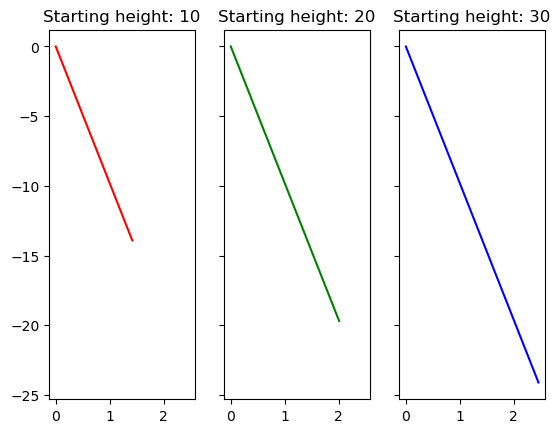

In [62]:
import matplotlib.pyplot as plt
import numpy as np

startingHeights = range(10, 40, 10)
heightsData = [ballFalling(i, 0.01) for i in startingHeights]
colors = ['r', 'g', 'b', 'r', 'g', 'b']

fig, ax = plt.subplots(1, len(heightsData), sharex=True, sharey=True)
for i in range(len(heightsData)):
    ax[i].plot(heightsData[i][0], heightsData[i][1], color=colors[i])
    ax[i].set_title("Starting height: " + str(startingHeights[i]))
plt.show()

As you can see, all the velocities curves are linear downwards as expected, and the higher the starting height, the lower (more negative) the final velocity

### With air resistance
Now we do the same steps as above but add back the air resistance!

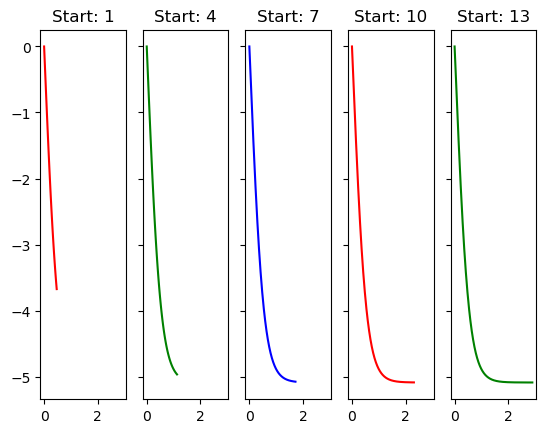

In [61]:
def ballFallingWithResistance(height, deltat):
    
    g_acceleration = vector(0, -9.8, 0)
    airDensity = 1.204
    dragCoeff = 0.1
    
    ball = sphere(pos=vector(0,height,0), radius=0.1, color=color.cyan)
    floor = box(pos=vector(0,0,0), size=vector(20,0.1,20), color=color.green)
    ball.velocity = vector(0,0,0)
    ball.acceleration = vector(0, -9.8, 0)
    ball.mass = 0.1 # in kgs
    deltat = deltat
    t = 0
    times = []
    velocities = []
    while t < 30:
        times.append(t)
        velocities.append(ball.velocity.y)
        ball.g_force = g_acceleration*ball.mass
        if mag(ball.velocity)==0:
            ball.direction = vector(0,0,0)
        else:
            ball.direction = ball.velocity/mag(ball.velocity)
        ball.drag_force = ball.direction*airDensity*dragCoeff*3.1415*ball.radius*(mag(ball.velocity)**2)
        ball.net_force = ball.g_force - ball.drag_force
        ball.acceleration = ball.net_force/ball.mass
        ball.velocity = ball.velocity + ball.acceleration*deltat
        ball.pos = ball.pos + ball.velocity*deltat
        t = t + deltat
        if ball.pos.y < 0:
            break
    return (times,velocities)

startingHeights = range(1, 16, 3)
heightsData = [ballFallingWithResistance(i, 0.01) for i in startingHeights]
colors = ['r', 'g', 'b', 'r', 'g', 'b', 'r', 'g', 'b', 'r', 'g', 'b', 'r', 'g', 'b', 'r', 'g', 'b']

fig, ax = plt.subplots(1, len(heightsData), sharex=True, sharey=True)
for i in range(len(heightsData)):
    ax[i].plot(heightsData[i][0], heightsData[i][1], color=colors[i])
    ax[i].set_title("Start: " + str(startingHeights[i]))
plt.show()

Here you can see that regardless of the starting height, the max speed the ball can reach is around -5 meters per second. This is great cause it indicates the presence of a terminal velocity! I would like to do more analysis with the graphs with parameterizing the air resistance features like drag coefficient and air density and ball radius etc, but I got busy this week and didn't have time to do it.

## Ball Bouncing Revisited
### Elastic
Here we will do the same thing as with the revisited ball falling, but with ball bouncing! And we will do it once with elastic collisions and once with inelastic! Also here we are graphing position over time instead of velocity over time!

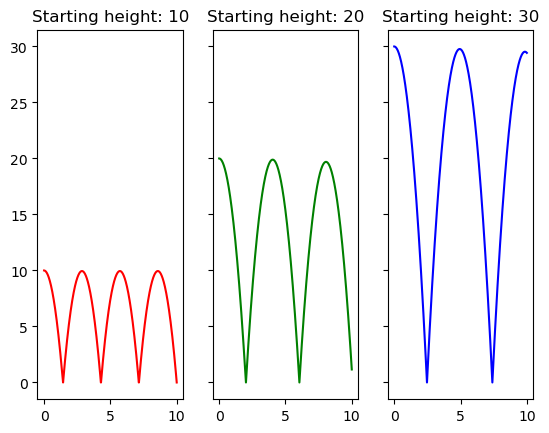

In [70]:
def ballBouncingElastic(height, deltat):
    ball = sphere(pos=vector(0,height,0), radius=0.1, color=color.cyan)
    floor = box(pos=vector(0,0,0), size=vector(20,0.1,20), color=color.green)
    ball.velocity = vector(0,0,0)
    ball.acceleration = vector(0, -9.8, 0)
    deltat = deltat
    t = 0
    times = []
    heights = []
    while t < 10:
        times.append(t)
        heights.append(ball.pos.y)
        ball.velocity = ball.velocity + ball.acceleration*deltat
        ball.pos = ball.pos + ball.velocity*deltat
        t = t + deltat
        if ball.pos.y < 0:
            ball.pos.y = 0
            ball.velocity.y *= -1
    return (times,heights)

startingHeights = range(10, 40, 10)
heightsData = [ballBouncingElastic(i, 0.01) for i in startingHeights]
colors = ['r', 'g', 'b', 'r', 'g', 'b']

fig, ax = plt.subplots(1, len(heightsData), sharex=True, sharey=True)
for i in range(len(heightsData)):
    ax[i].plot(heightsData[i][0], heightsData[i][1], color=colors[i])
    ax[i].set_title("Starting height: " + str(startingHeights[i]))
plt.show()

### Inelastic

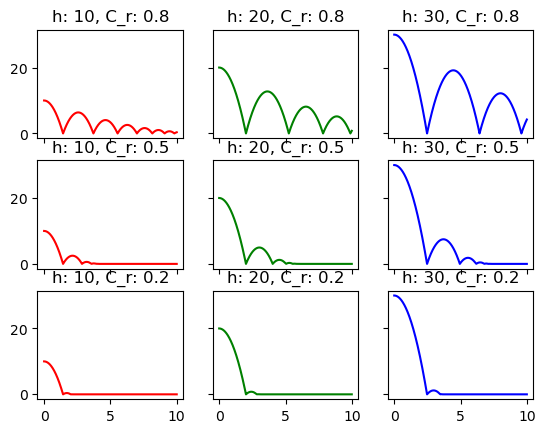

In [78]:
def ballBouncingInelastic(height, coeffRestitution, deltat):
    
    coeffRestituion = coeffRestitution
    
    ball = sphere(pos=vector(0,height,0), radius=0.1, color=color.cyan)
    floor = box(pos=vector(0,0,0), size=vector(20,0.1,20), color=color.green)
    ball.velocity = vector(0,0,0)
    ball.acceleration = vector(0, -9.8, 0)
    deltat = deltat
    t = 0
    times = []
    heights = []
    while t < 10:
        times.append(t)
        heights.append(ball.pos.y)
        ball.velocity = ball.velocity + ball.acceleration*deltat
        ball.pos = ball.pos + ball.velocity*deltat
        t = t + deltat
        if ball.pos.y < 0:
            ball.pos.y = 0
            ball.velocity.y *= -coeffRestitution
    return (times,heights)

startingHeights = range(10, 40, 10)
# Using 3 different heights lists instead of a 2d list because that would be a pain
# And we don't ever need more than 3 here
heightsData1 = [ballBouncingInelastic(i, 0.8, 0.005) for i in startingHeights]
heightsData2 = [ballBouncingInelastic(i, 0.5, 0.005) for i in startingHeights]
heightsData3 = [ballBouncingInelastic(i, 0.2, 0.005) for i in startingHeights]
colors = ['r', 'g', 'b', 'r', 'g', 'b']

fig, ax = plt.subplots(3, len(heightsData), sharex=True, sharey=True)
for i in range(len(heightsData)):
    ax[0, i].plot(heightsData1[i][0], heightsData1[i][1], color=colors[i])
    ax[0, i].set_title("h: " + str(startingHeights[i]) + ", C_r: " + str(0.8))
    
    ax[1, i].plot(heightsData2[i][0], heightsData2[i][1], color=colors[i])
    ax[1, i].set_title("h: " + str(startingHeights[i]) + ", C_r: " + str(0.5))
    
    ax[2, i].plot(heightsData3[i][0], heightsData3[i][1], color=colors[i])
    ax[2, i].set_title("h: " + str(startingHeights[i]) + ", C_r: " + str(0.2))
plt.show()

Here, moving left to right among the graphs, you get increasing starting heights. And moving up to down among the graphs, you get decreasing coefficients of restitution!